#Group B Assignment

Daniel B., Albin S., Jorge R., Nicolas G., Tomas F., & Ckalib N.

#Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_json("Luxury_Beauty_5.json", lines=True)
dfMd = pd.read_json("meta_Luxury_Beauty.json", lines=True)

#Exploratory Data Analysis

## Luxury Dataset

In [3]:
#View data
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [4]:
#(rows,columns)
df.shape

(34278, 12)

In [5]:
#Column names
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

__reviewerID__ - ID of the reviewer

__asin__ - ID of the product

__reviewerName__ - name of the reviewer

__vote__ - helpful votes of the review

__style__ - a dictionary of the product metadata, e.g., "Format" is "Hardcover"

__reviewText__ - text of the review

__overall__ - rating of the product

__summary__ - summary of the review

__unixReviewTime__ - time of the review (unix time)

__reviewTime__ - time of the review (raw)

__image__ - images that users post after they have received the product

In [6]:
#Describe numerical columns
df.describe()

,overall,unixReviewTime,vote
count,34278.00000,3.427800e+04,6532.000000
mean,4.28616,1.445171e+09,7.315677
std,1.03736,4.962381e+07,21.295736
min,1.00000,1.127174e+09,2.000000
25%,4.00000,1.411430e+09,2.000000
50%,5.00000,1.448410e+09,3.000000
75%,5.00000,1.484093e+09,6.000000
max,5.00000,1.537747e+09,686.000000


In [7]:
#Describe non-numerical columns
df.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
reviewTime,34278,2510,"06 19, 2017",180
reviewerID,34278,3819,AJL6HX8O2QLVO,127
asin,34278,1581,B001MF3FMW,1221
style,16841,1558,{'Size:': ' 8 oz.'},296
reviewerName,34278,3584,Amazon Customer,983
reviewText,34265,24245,I was looking for a relatively inexpensive soa...,123
summary,34263,20109,Five Stars,3521
image,617,495,[https://images-na.ssl-images-amazon.com/image...,12


In [8]:
#We use a clean function to check missing values
def missing_values_table(df):
    """
    Function to calculate missing values by column
    Source: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
    :param df: Source data frame
    :return: Data frame with the list of missing value and % of total values per colum
    """
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
image,33661,98.2
vote,27746,80.9
style,17437,50.9
summary,15,0.0
reviewText,13,0.0


## Luxury Metadata

In [9]:
#View Metadata
dfMd.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00,B00004U9V2
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,NaT,,B0000531EN
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],[https://images-na.ssl-images-amazon.com/image...,,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,NaT,,B0000532JH
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],[https://images-na.ssl-images-amazon.com/image...,,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,NaT,$15.99,B00005A77F
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,NaT,$18.00,B00005NDTD


In [10]:
dfMd.shape

(12299, 18)

In [11]:
dfMd.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin'],
      dtype='object')

In [12]:
#Describe numerical columns
dfMd.describe()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
count,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,12299,0,12299,12299
unique,1,1,10829,1,11719,7520,10006,1,8,2,11936,8640,11838,1,1,0,1079,12111
top,[],,[],,OPI Infinite Shine,[],[],,,[],[],[],{},Luxury Beauty,,NaN,,B00021DDBK
freq,12299,12299,150,12299,36,4575,2052,12299,12287,12296,98,3253,242,12299,12299,NaN,5260,2


In [13]:
#Describe non-numerical columns
dfMd.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
category,12299,1,[],12299
tech1,12299,1,,12299
description,12299,10829,[],150
fit,12299,1,,12299
title,12299,11719,OPI Infinite Shine,36
also_buy,12299,7520,[],4575
image,12299,10006,[],2052
tech2,12299,1,,12299
brand,12299,8,,12287
feature,12299,2,[],12296


In [14]:
#Missing values of dataset
missing_values = missing_values_table(dfMd)
missing_values.head(20)

Your selected dataframe has 18 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
date,12299,100.0


## Merge Luxury Dataset with Metadata

In [15]:
df = pd.merge(df, dfMd, how='left', on='asin')
df.head(100)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00
1,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00
2,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00
3,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00
4,5,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,False,"04 29, 2015",A2JP9E1H0SF392,B000068DWY,NaN,TobycW,This is one of the great modern classics. I t...,Timeless,1430265600,NaN,NaN,[],,[Purity. Unity. Fresh. The revolutionary first...,,"Calvin Klein ck one Eau de Toilette, 3.4 fl. oz.","[B000C21050, B000E7WFX4, B01AU3JTC6, B000E7YK5...",[https://images-na.ssl-images-amazon.com/image...,,,[],"30,752 in Beauty &amp; Personal Care (","[B000C21050, B000C2105A, B000E7WFX4, B00JB44FX...",{' Product Dimensions: ': '2.9 x 1.4 ...,Luxury Beauty,,NaT,$64.00
96,3,False,"04 28, 2015",A3IOCPLIMYDBCD,B000068DWY,NaN,Hummingbirder,ck one opens with a blast of pineapple and ber...,Mossy Gourmand,1430179200,NaN,NaN,[],,[Purity. Unity. Fresh. The revolutionary first...,,"Calvin Klein ck one Eau de Toilette, 3.4 fl. oz.","[B000C21050, B000E7WFX4, B01AU3JTC6, B000E7YK5...",[https://images-na.ssl-images-amazon.com/image...,,,[],"30,752 in Beauty &amp; Personal Care (","[B000C21050, B000C2105A, B000E7WFX4, B00JB44FX...",

In [16]:
#Name of columns
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image_x', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image_y', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'details', 'main_cat', 'similar_item', 'date', 'price'],
      dtype='object')

In [17]:
#Should be (34278,29)
df.shape

(35858, 29)

In [18]:
#Missing values of dataset
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 29 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
date,35858,100.0
image_x,35206,98.2
vote,29120,81.2
style,17723,49.4
tech2,50,0.1
similar_item,50,0.1
main_cat,50,0.1
details,50,0.1
also_view,50,0.1
rank,50,0.1


## Basic Statistics

In [19]:
df.describe(include="all")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
count,35858.000000,35858,35858,35858,35858,18135,35858,35845,35841,3.585800e+04,6738.000000,652,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,35808,0,35808
unique,NaN,2,2510,3819,1581,1558,3584,24245,20109,NaN,NaN,495,1,1,1531,1,1535,1340,1493,1,3,1,1569,1493,1485,1,1,0,336
top,NaN,True,"06 19, 2017",AJL6HX8O2QLVO,B001MF3FMW,{'Size:': ' 8 oz.'},Amazon Customer,I was looking for a relatively inexpensive soa...,Five Stars,NaN,NaN,[https://images-na.ssl-images-amazon.com/image...,[],,[Essie nail lacquer goes on smooth and last lo...,,essie Nail Color Polish,[],[https://images-na.ssl-images-amazon.com/image...,,,[],"3,730 in Beauty & Personal Care (","[B00837YY18, B00FF77IQC, B00TKOK5KC, B003VS5O3...",{' Product Dimensions: ': '1.1 x 1.1 ...,Luxury Beauty,,NaN,
freq,NaN,18718,195,127,1221,296,1038,123,3766,NaN,NaN,12,35808,35808,3173,35808,3641,3636,3173,35808,35779,35808,1221,1221,3173,35808,35808,NaN,8324
mean,4.289447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.445510e+09,7.450134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.036318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.991266e+07,22.661312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.127174e+09,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411862e+09,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.449014e+09,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485216e+09,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
reviewTime,35858,2510,"06 19, 2017",195
reviewerID,35858,3819,AJL6HX8O2QLVO,127
asin,35858,1581,B001MF3FMW,1221
style,18135,1558,{'Size:': ' 8 oz.'},296
reviewerName,35858,3584,Amazon Customer,1038
reviewText,35845,24245,I was looking for a relatively inexpensive soa...,123
summary,35841,20109,Five Stars,3766
image_x,652,495,[https://images-na.ssl-images-amazon.com/image...,12
category,35808,1,[],35808
tech1,35808,1,,35808


## Missing Values

In [21]:
#We use a clean function to check missing values
def missing_values_table(df):
    """
    Function to calculate missing values by column
    Source: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
    :param df: Source data frame
    :return: Data frame with the list of missing value and % of total values per colum
    """
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 29 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
date,35858,100.0
image_x,35206,98.2
vote,29120,81.2
style,17723,49.4
tech2,50,0.1
similar_item,50,0.1
main_cat,50,0.1
details,50,0.1
also_view,50,0.1
rank,50,0.1


Because we do not use any of these features in either recommender system, we did not bother to exlucde the features w/ missing values.

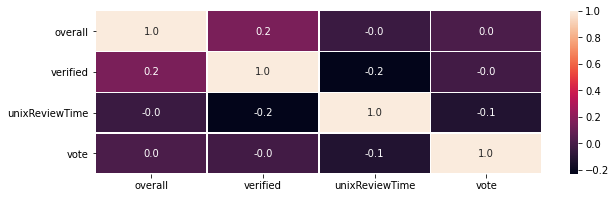

In [22]:
# Corrrelations using seaborn
# Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
# https://seaborn.pydata.org/introduction.html
import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10, 3))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Ratings distribution

The rating scale from this dataset goes from 1 to 5

In [23]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Count the number of times each rating appears in the dataset
data = df['overall'].value_counts().sort_index(ascending=False)

# Create the histogram
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

We can see that ratings are biased to positive score. This means we'll have to evaluate recommendations on a higher average score.

## Numbers of ratings per ASIN

Now we are going to check how many ratings each product has. 


In [24]:
# Number of ratings per movie
data = df.groupby('asin')['overall'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Asin',
                   xaxis = dict(title = 'Number of Ratings Per Asin'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

As expected, most products received less than 10 ratings. This means we have a smaller amout of products which receive most of the ratings and a bigger amount of products which receive a small count.

## Number of ratings per user



In [25]:
# Number of ratings per user
data = df.groupby('reviewerID')['overall'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0, size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

It's also biased to the left, meaning very few users rate more than 10 times.

# Collaborative Filtering Recommender System (CFRS)

### Install Surprise

Install the Surprise package for the analysis

In [26]:
! pip install scikit-surprise

     |████████████████████████████████| 11.8MB 4.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670932 sha256=70f9de463457cfc63a3bacf482abdb525748c7b26261077a502d4f56116faba3
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


## Import Data

In [27]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

## First Try: Neighbourhood-based Collaborative Filtering

Here were are measuring the KNN Model following the baseline approach.



In [28]:
from surprise import KNNBaseline

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
knn = KNNBaseline(sim_options=sim_options)

In [29]:
from surprise.model_selection import cross_validate

results = cross_validate(knn, data, measures=['RMSE'], cv=3, verbose=True)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8708  0.8758  0.8714  0.8727  0.0022  
Fit time          0.24    0.22    0.21    0.22    0.01    
Test time         0.38    0.36    0.38    0.37    0.01    


RMSE is about 0.87.

Now we are going to compare it with a random rating based on the training set using the Normal Predictor.

In [30]:
from surprise import NormalPredictor

cross_validate(NormalPredictor(), data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3452  1.3219  1.3386  1.3352  0.0098  
Fit time          0.04    0.04    0.04    0.04    0.00    
Test time         0.29    0.08    0.08    0.15    0.10    


{'fit_time': (0.03552126884460449, 0.03518080711364746, 0.03594636917114258),
 'test_rmse': array([1.3451615 , 1.32187182, 1.33861762]),
 'test_time': (0.2897531986236572, 0.08246397972106934, 0.0837709903717041)}

RMSE is larger, meaning KNN is learning from the data set. 

1.3 is the threshold for the recommender system with this data set. 

## Tuning the parameters

In [31]:
from surprise import KNNBaseline
from surprise.model_selection import GridSearchCV

sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

The best configuration corresponds to a item-based configuration using Mean Square distance with a min support equals to 3, which is able to slightly reduce the RMSE to 0.81.

## Second Try: Matrix Factorization

Using SVD algorithm


In [32]:
from surprise import SVDpp

# We'll use the famous SVD algorithm.
svd = SVDpp()

cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)

{'fit_time': (5.955303430557251, 5.8455328941345215, 5.7628114223480225),
 'test_rmse': array([0.81249846, 0.81128148, 0.82709196]),
 'test_time': (0.3530287742614746, 0.3603181838989258, 0.3102900981903076)}

We got a better result than KNN in terms of RMSE. About 0.81

## Third Try: Benchmarking

Now we're checking the algorithms to see which gives us the best result.


In [33]:
from surprise import SVD
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), BaselineOnly(), CoClustering()]:
    
    print("Testing {}".format(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Testing <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7efe99363048>
Testing <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7efe993636d8>
Testing <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7efe993638d0>
Testing <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7efe993634e0>
Testing <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7efe993639e8>
Testing <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7efe99363fd0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Testing <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7efe99363dd8>
Estimating biases using als...
Estimating biases using als

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.817114,5.811099,0.316819
SVD,0.826603,1.445335,0.087448
KNNBaseline,0.862281,0.550287,1.442427
CoClustering,0.875028,0.862058,0.067181
SlopeOne,0.901680,0.120490,0.183391
BaselineOnly,0.917598,0.042997,0.058124
NMF,0.917980,1.855630,0.078385
NormalPredictor,1.325615,0.035435,0.083549


SVD and SVD++ are the most accurate, however they take longer to train than KNNBaseline.

## Get Neighbours



In [34]:
# Execute KNN
sim_options = {'name': 'pearson_baseline', 'user_based': False}
knn = KNNBaseline(sim_options=sim_options)
knn.fit(data.build_full_trainset())

# Target asin to analyze its neighbourhood (Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ)
asin = 'B00004U9V2'

# Get the closes neighbourds
neighbors = knn.get_neighbors(knn.trainset.to_inner_iid(asin), k=10)
# Translate the internal ids used in the algorithm to the asins
neighbors = (knn.trainset.to_raw_iid(inner_id) for inner_id in neighbors)

print()
print('The 10 nearest neighbors of {} are:\n'.format(asin))
for asin in neighbors:
    print("\t",asin)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

The 10 nearest neighbors of B00004U9V2 are:

	 B00FRERO7G
	 B00172XBOC
	 B000PHTC20
	 B00FASVFI8
	 B01B3QIEPC
	 B000Q39MBY
	 B0007WX0EY
	 B00TBJWP86
	 B000GAO1PE
	 B000MEKG30


In [35]:
# Pivot table to check if the neighbors make sense
dfNb = pd.pivot_table(df,index=["asin","title"], values=["overall"])

# Query the asins
Neighbors = dfNb.query("asin == ['B00FRERO7G','B00172XBOC','B000PHTC20','B00FASVFI8','B01B3QIEPC','B000Q39MBY','B0007WX0EY','B00TBJWP86','B000GAO1PE','B000MEKG30']")
Neighbors

,,overall
asin,title,
B0007WX0EY,"Mustela Gentle Shampoo, Tear Free Baby Shampoo with Natural Avocado Perseose, Gently Cleanses and Detangles Kids' Hair, Available in 6.76 and 16.9 fl. oz",3.600000
B000GAO1PE,"MenScience Androceuticals Advanced Deodorant, 2.6 oz.",4.857143
B000MEKG30,Marvis Whitening Mint Toothpaste,4.916667
B000PHTC20,"EltaMD UV Sport Sunscreen Broad-Spectrum SPF 50, 3.0 oz",4.600000
B000Q39MBY,"Crabtree &amp; Evelyn Nail and Cuticle Therapy Gardeners, 0.52 Fl Oz",3.555556
B00172XBOC,LAFCO New York House &amp; Home Candle,4.466667
B00FASVFI8,"Crabtree &amp; Evelyn Ultra-Moisturising Hand Cream Therapy, Tarocco Orange, Eucalyptus &amp; Sage, 3.5 oz",5.000000
B00FRERO7G,Crabtree &amp; Evelyn Gardeners Ultra-Moisturising Hand Cream Therapy - 3.5 oz,4.700000
B00TBJWP86,"La Roche-Posay Effaclar BB Blur with SPF 20, 1.01 Fl. Oz.",4.119048


They look kind of related, some more than others. But we could group most of them in a relaxing therapeutical products. 

## Check Factorized Matrices



## Analyze BIAS

Now we are going to look for the Worst and Best performing products.



### Product performance

We'll use the matrix factorization method to rank the best and worst performing products in terms of ranking.

#### Worst performing products


In [36]:
asin_bias = [(b, data.build_full_trainset().to_raw_iid(i)) for i, b in enumerate(svd.bi)]
print("Worst products ever:")
sorted(asin_bias, key=lambda x: x[0])[:15]

Worst products ever:


[(-1.3007927555211778, 'B00AWK6MF0'),
 (-1.1363964449302353, 'B000IOAA12'),
 (-1.0464591355644641, 'B0017XFSB0'),
 (-1.0225735262543398, 'B000N2KWOY'),
 (-0.9166246073030185, 'B00JR66C9Q'),
 (-0.8936981537486082, 'B000VXUTEI'),
 (-0.8838639786253288, 'B000QU75H0'),
 (-0.8214614720620964, 'B00BD3R1PU'),
 (-0.8017994627782374, 'B000BIGOY2'),
 (-0.8001366315313739, 'B018GZYGFU'),
 (-0.7844181525239557, 'B00SH8YWYW'),
 (-0.7820475990843164, 'B00JGX9C6A'),
 (-0.775693175677671, 'B01A982YRO'),
 (-0.7677924285165617, 'B003H5YNVC'),
 (-0.7582411593856131, 'B002NPWWZQ')]

In [37]:
# Query the asins
WorstPP = dfNb.query("asin == ['B00203Q9B4','B0016KTQ0I','B00396VE7U','B00TBJWP86','B006JYMPUO','B002RS6JSA','B00D9I9WU4','B0014K90S8','B00IBDCYVQ','B004WMJWII','B0011FQBO2', 'B000JL7Z5S', 'B000Z5Y3I0', 'B000V87E7S', 'B000GDJDPE']")
WorstPP

,,overall
asin,title,
B000GDJDPE,"JACK BLACK &ndash; Pure Clean Daily Facial Cleanser &ndash; 2-in-1 Facial Cleanser and Toner, Removes Dirt and Oil, PureScience Formula, Certified Organic Ingredients, Aloe and Sage Leaf, 3, 6, 16 oz.",4.473684
B000JL7Z5S,Juicy Couture Women's Perfume,4.200000
B000V87E7S,"Mario Badescu Drying Cream, 0.5 oz.",4.500000
B000Z5Y3I0,VINCENT LONGO Pearlessence Lip and Cheek Gel Stain,3.000000
B0011FQBO2,"PCA SKIN Anti-Redness Serum, 1 fl. oz.",4.000000
B0014K90S8,"Red Door Cream Deodorant by Elizabeth Arden, 1.5 Ounce",5.000000
B0016KTQ0I,Paul Mitchell Pro Tools 413 Sculpting Brush,3.000000
B00203Q9B4,ORIBE Supershine Moisturizing Cr&egrave;me,3.944444
B002RS6JSA,CHI Iron Guard Thermal Protection Spray 8 OZ,4.444444


#### Best performing products

In [38]:
print("Best products ever:")
sorted(asin_bias, key=lambda x: -x[0])[:15]

Best products ever:


[(0.5145938846028919, 'B0010TOZ5Q'),
 (0.5008442945299308, 'B00H90VR8S'),
 (0.49813367517239543, 'B001CJJ5XG'),
 (0.48654582278246505, 'B0016A18YU'),
 (0.48286009667909235, 'B0001Z66UM'),
 (0.47979863361124225, 'B004J0XOTQ'),
 (0.47425882341653197, 'B0058QM77K'),
 (0.47000591342733905, 'B003CR4KRM'),
 (0.4664227927118531, 'B005M2XHBK'),
 (0.45900086874646684, 'B00265YNFK'),
 (0.4466949355031533, 'B00Y8BVZDI'),
 (0.44262572791331667, 'B00CNE2GOO'),
 (0.44012939664990175, 'B0015Z90NC'),
 (0.43907590858974327, 'B000Z5YC5O'),
 (0.43527660998961387, 'B000IOLCWI')]

In [39]:
# Query the asins
BestPP = dfNb.query("asin == ['B0014JWNME','B0002X9038','B000S7ZMDA','B00172NN22','B00FW6O5FI','B00021D2Z2','B000PHKE0O','B0016LXK6I','B00BBIAVDG','B004UQHJ7M','B000AV4XW0', 'B007Y550PO', 'B0009HBOPE', 'B0019IVEEI', 'B004I14JCC']")
BestPP

,,overall
asin,title,
B00021D2Z2,"Mustela Nourishing Stick With Cold Cream, Ceramides and Natural Avocado Perseose, Moisturizer for Baby Skin",4.200000
B0002X9038,"PCA SKIN Pigment Gel, 1 oz",4.500000
B0009HBOPE,Jouer Essential Lip Enhancer 0.33 Fl Oz,3.677419
B000AV4XW0,"Natura Bisse Stabilizing Cleansing Mask, 7.0 fl. oz.",3.785714
B000PHKE0O,OPI Nail Files,4.111111
B000S7ZMDA,St. Tropez Self Tan Bronzing Mousse,4.000000
B0014JWNME,Elizabeth Arden Beautiful Color Smoky Eyes Pencil,4.800000
B0016LXK6I,CND SolarOil,5.000000
B00172NN22,"Mario Badescu Fruit and Vitamin A Hand Cream, 4 Fl Oz",4.000000


### User Bias



#### Negative User Bias

In [40]:
reviewerID_bias = [(b, data.build_full_trainset().to_raw_uid(i)) for i, b in enumerate(svd.bu)]
sorted(reviewerID_bias, key=lambda x: x[0])[0]

(-1.7188053462994797, 'A3HRDRQ5VAFPQS')

In [41]:
df[df.reviewerID == 'A2G865VVNGP6E'].sort_values(by = 'overall', ascending = True)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
26007,3,False,"07 12, 2017",A2G865VVNGP6E,B00H2VO6P0,{'Color:': ' 30C Suntan: For light to medium s...,HSM,"Per my wife the makeup fanatic, The color was ...",Not very good for oily skin,1499817600,NaN,NaN,[],,"[, Need help finding your shade? Dermablend&rs...",,Dermablend Intense Powder High Coverage Founda...,"[B00M0V39VE, B00352GMFM, B00014GT8W, B0002RI2P...",[https://images-na.ssl-images-amazon.com/image...,,,[],"90,936 in Beauty & Personal Care (","[B078VR4ZTJ, B076LW35CN, B07J6SWRND, B0748G28V...",{' Product Dimensions: ': '3.1 x 0.9 ...,Luxury Beauty,,NaT,$34.00
28247,4,False,"07 10, 2017",A2G865VVNGP6E,B00M0V39VE,{'Color:': ' 40C Sepia: For medium skin with w...,HSM,"Per my wife, the product is very creamy, but i...",provides great coverage but did not cover my p...,1499644800,NaN,NaN,[],,"[, Need help finding your shade? Dermablend&rs...",,Dermablend Smooth Liquid Foundation with SPF 2...,"[B0002RI2PG, B00H2VO574, B00M0V3D7Y, B002NS598...",[https://images-na.ssl-images-amazon.com/image...,,,[],"81,785 in Beauty & Personal Care (","[B07J6SWRND, B078VR4ZTJ, B076LW35CN, B0748G28V...",{' Product Dimensions: ': '2.1 x 0.9 ...,Luxury Beauty,,NaT,$38.00
32895,4,False,"11 17, 2016",A2G865VVNGP6E,B01EBNHEQO,NaN,HSM,"Shaving cream lathered up beautifully, I cant ...","I'm not to crazy about the smell, but the prod...",1479340800,NaN,NaN,[],,"[This rich, hydrating, lathering gel-to-cream ...",,V76 by Vaughn CLEAN SHAVE Hydrating Gel Cream ...,"[B01E85Z3YK, B01EBTAZ3M, B01EBTB11C, B01EBTAU5...",[https://images-na.ssl-images-amazon.com/image...,,,[],"83,713 in Beauty & Personal Care (","[B01E85Z3YK, B07KJZWSYH, B003AV0OM0, B000NC3HP...",{' Product Dimensions: ': '2.1 x 2.1 ...,Luxury Beauty,,NaT,$19.00
882,5,False,"07 14, 2017",A2G865VVNGP6E,B00014GT8W,{'Color:': ' 35W Warm Beige: For medium skin t...,HSanchez,"My wife is a die hard makeup fan, so when I m...",Great Coverage,1499990400,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermablend Cover Creme Full Coverage Foundatio...,"[B0002RI2PG, B002LVN3XC, B06XNRMPJP, B07C1TVQ8...",[https://images-na.ssl-images-amazon.com/image...,,,[],"25,522 in Beauty &amp; Personal Care (","[B07J6SWRND, B076LW35CN, B0749Z1PSS, B0748G28V...",{' Product Dimensions: ': '2.3 x 2.3 ...,Luxury Beauty,,NaT,$39.00
883,5,False,"07 14, 2017",A2G865VVNGP6E,B00014GT8W,{'Color:': ' 35W Warm Beige: For medium skin t...,HSanchez,"My wife is a die hard makeup fan, so when I m...",Great Coverage,1499990400,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermablend Cover Creme Full Coverage Foundatio...,"[B0002RI2PG, B002LVN3XC, B06XNRMPJP, B07C1TVQ8...",[https://images-na.ssl-images-amazon.com/image...,,,[],"25,522 in Beauty &amp; Personal Care (","[B07J6SWRND, B076LW35CN, B0749Z1PSS, B0748G28V...",{' Product Dimensions: ': '2.3 x 2.3 ...,Luxury Beauty,,NaT,$39.00
892,5,False,"07 12, 2017",A2G865VVNGP6E,B00014GT8W,{'Color:': ' 30C True Beige: For light skin wi...,HSanchez,"My wife is a die hard makeup fan, she watches ...",color was a little off than what was expected,1499817600,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermablend Cover Creme Full Coverage Foundatio...,"[B0002RI2PG, B002LVN3XC, B06XNRMPJP, B07C1TVQ8...",[https://images-na.ssl-images-amazon.com/image...,,,[],"25,522 in Beauty &amp; Personal Care (","[B07J6SWRND, B076LW35CN, B0749Z1PSS, B0748G28V...",{' Product Dimensions: ': '2.3 x 2.3 ...,Luxury Beauty,,NaT,$39.00
893,5,False,"07 12, 2017",A2G865VVNGP6E,B00014GT8W,{'Color:': ' 30C True Beige: For light skin wi...,HSanchez,"My wife is a die hard makeup fan, she watches ...",color was a little off than what was expected,1499817600,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermable

#### Positive User Bias

In [42]:
reviewerID_bias = [(b, data.build_full_trainset().to_raw_uid(i)) for i, b in enumerate(svd.bu)]
sorted(reviewerID_bias, key=lambda x: x[0])[-1]

(0.638853443569891, 'A17CBPANJ3G5T9')

In [43]:
df[df.reviewerID == 'A5U5T6EWH90O0']

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
756,5,False,"08 28, 2017",A5U5T6EWH90O0,B00014GT8W,{'Color:': ' 10N Warm Ivory: For fair skin wit...,Lauri,I started out not liking this product at all. ...,I have grown to love this.,1503878400,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermablend Cover Creme Full Coverage Foundatio...,"[B0002RI2PG, B002LVN3XC, B06XNRMPJP, B07C1TVQ8...",[https://images-na.ssl-images-amazon.com/image...,,,[],"25,522 in Beauty &amp; Personal Care (","[B07J6SWRND, B076LW35CN, B0749Z1PSS, B0748G28V...",{' Product Dimensions: ': '2.3 x 2.3 ...,Luxury Beauty,,NaT,$39.00
757,5,False,"08 28, 2017",A5U5T6EWH90O0,B00014GT8W,{'Color:': ' 10N Warm Ivory: For fair skin wit...,Lauri,I started out not liking this product at all. ...,I have grown to love this.,1503878400,NaN,NaN,[],,"[, Need help finding your shade? Dermablends m...",,Dermablend Cover Creme Full Coverage Foundatio...,"[B0002RI2PG, B002LVN3XC, B06XNRMPJP, B07C1TVQ8...",[https://images-na.ssl-images-amazon.com/image...,,,[],"25,522 in Beauty &amp; Personal Care (","[B07J6SWRND, B076LW35CN, B0749Z1PSS, B0748G28V...",{' Product Dimensions: ': '2.3 x 2.3 ...,Luxury Beauty,,NaT,$39.00
11894,4,False,"11 18, 2014",A5U5T6EWH90O0,B001AV8MLW,NaN,Lauri,"This serum comes in a glass bottle, and has an...",Beware of the labeling.,1416268800,NaN,NaN,[],,[Pump cleanser on dry hands and massage into d...,,"Juice Beauty Blemish Clearing Serum, 2 fl. oz.","[B001F0D11Y, B008VIHCD6, B0761YRKFG, B009JCVSV...",[https://images-na.ssl-images-amazon.com/image...,,,[],"37,003 in Beauty & Personal Care (","[B001F0D11Y, B00C9O4EHA, B008VIHCD6, B0761YRKF...",{' Product Dimensions: ': '2 x 4 x 5 ...,Luxury Beauty,,NaT,$30.00
19781,4,False,"04 23, 2011",A5U5T6EWH90O0,B005NQRPFO,NaN,Lauri,I was so excited to receive this product for r...,At Home Skin Care,1303516800,122.0,NaN,[],,[One Speed | Classic Face & Body Caps Personal...,,PMD Personal Microderm Classic,"[B00N1W6CJW, B07GH6CL39, B005WOIUQA, B07582BWM...",[https://images-na.ssl-images-amazon.com/image...,,,[],"12,000 in Beauty & Personal Care (","[B079P7DJ5Y, B01MTGGPD6, B07H4941DZ, B00OP2YGX...",{},Luxury Beauty,,NaT,$159.00
21569,5,False,"07 7, 2014",A5U5T6EWH90O0,B0089HGSMK,{'Size:': ' 1.7 fl.oz'},Lauri,Both my daughter (19) and I LOVE this scent. ...,Daughter and I are fighting over this bottle!!!,1404691200,7.0,NaN,[],,[Burberry Brit Eau de Parfum is a green orient...,,"Burberry Brit For Her Eau de Toilette Spray, 1...","[B01GTAWPQG, B00BR1M54A, B00FBH5AXY, B00FBH54E...",[https://images-na.ssl-images-amazon.com/image...,,,[],"55,845 in Beauty & Personal Care (","[B01GTAWPQG, B00LMG6PGO, B000E7WHQY, B00BR1M54...",{' Product Dimensions: ': '0.6 x 2.6 ...,Luxury Beauty,,NaT,$78.00
27628,5,False,"06 17, 2016",A5U5T6EWH90O0,B00JRW7QCC,{'Style:': ' NuFACE mini Facial Toning Device ...,Lauri,I am always open to trying new facial products...,Noticeable difference!,1466121600,6.0,NaN,[],,[All the benefits of a microcurrent treatment ...,,NuFACE mini Facial Toning Set | Wrinkle Reduce...,"[B074D6WCG9, B076NST44M, B074D6VLMY, B012A2TQX...",[https://images-na.ssl-images-amazon.com/image...,,,[],"37,059 in Beauty & Personal Care (","[B07B7HYYS9, B07FJPRV7L, B075JNPJYG, B07D1D8SW...",{},Luxury Beauty,,NaT,$198.98
29481,5,False,"10 28, 2015",A5U5T6EWH90O0,B00TBJWP86,"{'Size:': ' 1 fl. oz.', 'Color:': ' Light/Medi...",Lauri,I have been using a similar product from Origi...,Love LOVE this product,1445990400,NaN,NaN,[],,[Amazon is an authorized retailer of La Roche-...,,"La Roche-Posay Effaclar BB Blur with SPF 20, 1...","[B00B4RJP72, B01LZN87IK, B003JSEGNC, B005IXG9Y...",[https://images-na.ssl-images-amazon.com/image...,,,[],"14,406 in Beauty & Personal Care (","[B00B4RJP72, B01LX3Z06S, B00M0V03Q8, B074F38L8...",{' Product

## Analyze Factors

For our last approach we tried reducing the factors with principal component analysis.



In [44]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(svd.qi)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [45]:
trainset = data.build_full_trainset()

In [46]:
trainset = data.build_full_trainset()

for row in principalDf.sort_values(by='principal component 1', ascending=False).head(10).iterrows():
    print("Product: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][0]))

Product: B000FD98MS with PC value = 13.82256198932214
Product: B00005V50B with PC value = 13.629286275048775
Product: B0002RI2PG with PC value = 13.600117900362171
Product: B00014351Q with PC value = 13.495720752503816
Product: B0006B4VVW with PC value = 13.328292791713071
Product: B00021EA9Y with PC value = 13.301225702361098
Product: B0002L93N2 with PC value = 13.030234657556118
Product: B0001EKYEM with PC value = 12.809271111330148
Product: B000N97V5A with PC value = 3.7638754876192504
Product: B0011FMDU8 with PC value = 3.116492563493839


In [47]:
# Query the asins
PCA1 = dfNb.query("asin == ['B0001EL9BO','B0002CEIQ8','B00005V50B','B0002L93N2','B00021AMZK','B000C1VYDY','B000GHXTPA','B00021B3XU','B0006PJRVM','B000A2NHP8']")
PCA1

,,overall
asin,title,
B00005V50B,"Supersmile Professional Teeth Whitening Toothpaste Recommended By Cosmetic Dentists, CLINICALLY...",4.428571
B0001EL9BO,jane iredale Amazing Base Loose Mineral Powder,4.851852
B00021AMZK,stila Illuminating Liquid Foundation,4.600000
B00021B3XU,stila Convertible Color Dual Lip and Cheek Cream,4.750000
B0002CEIQ8,La Roche-Posay Thermal Spring Water for Sensitive Skin,4.318182
B0002L93N2,HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results,3.923077
B0006PJRVM,"ZOYA Nail Polish, 0.5 fl. oz.",4.312500
B000A2NHP8,L'Occitane Cleansing Verbena Liquid with Organic Verbena Extract,5.000000
B000C1VYDY,"John Varvatos Eau de Toilette Spray, 4.2 fl. Oz. mens cologne",4.454545


In [48]:
for row in principalDf.sort_values(by='principal component 2', ascending=False).head(10).iterrows():
    print("Product: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][1]))

Product: B000BYVBIU with PC value = 10.163245759647156
Product: B0001EL5R2 with PC value = 7.827225731491421
Product: B0002CEIQ8 with PC value = 6.289522901447954
Product: B00014GT8W with PC value = 5.755038014717468
Product: B001LITXVW with PC value = 5.269422202855968
Product: B000BK1U5S with PC value = 4.857125824469171
Product: B000OYHN2K with PC value = 4.703871332465065
Product: B000M00V2K with PC value = 4.531482457888183
Product: B000Z5Y3I0 with PC value = 4.271777497540268
Product: B00113RO5O with PC value = 4.081431970369837


In [49]:
# Query the asins
PCA2 = dfNb.query("asin == ['B000A2NHP8','B0006PJRVM','B00092M35O','B000BIGOY2','B0007ZG2DW','B000BJUS6Q','B0009PL3B6','B004SY3X3A','B0002MES86','B000X1M8VK']")
PCA2

,,overall
asin,title,
B0002MES86,Lacoste Style in Play Eau de Toilette for Men,5.000000
B0006PJRVM,"ZOYA Nail Polish, 0.5 fl. oz.",4.312500
B0007ZG2DW,"jane iredale Disappear Concealer, 0.50 oz.",4.307692
B00092M35O,BaBylissPRO Ceramic Tools Spring Curling Iron,3.500000
B0009PL3B6,"Pevonia Hydrating Sunscreen SPF 30, 5 Oz",5.000000
B000A2NHP8,L'Occitane Cleansing Verbena Liquid with Organic Verbena Extract,5.000000
B000BIGOY2,theBalm TimeBalm Concealer,4.200000
B000BJUS6Q,"JACK BLACK &ndash; Cool Moisture Body Lotion &ndash; Nourish Body Skin, Refreshes Overheated Skin, Mild Natural Scent, Soy Protein, Vitamin E and Jojoba, Macadamia Nut Oil, Vitamin E, 16 oz.",4.666667
B000X1M8VK,PHILIP B Rejuvenating Oil,4.600000


In [50]:
for row in principalDf.sort_values(by='principal component 3', ascending=False).head(10).iterrows():
    print("Product: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][2]))

Product: B00014GT8W with PC value = 10.002326349748168
Product: B0002CEIQ8 with PC value = 9.73576300161712
Product: B0002L2JLU with PC value = 3.8451431232899234
Product: B001ECJJ1E with PC value = 3.494428890969645
Product: B0016A7D8K with PC value = 3.4725959848754493
Product: B000C1VYDY with PC value = 3.2391386132797555
Product: B0011FMDU8 with PC value = 3.1798251001295723
Product: B000CRQHNU with PC value = 3.1670692261049305
Product: B00GHXJDQQ with PC value = 3.1443955455575265
Product: B0001EKVCW with PC value = 3.0566189558600496


In [51]:
# Query the asins
PCA3 = dfNb.query("asin == ['B00092M35O','B0001EL5OU','B000R94SMU','B0007ZG2DW','B000VTTC4U','B00095LIP2','B000IOLCWI','B0002OZ018','B0010JREC2','B000LZBNJG']")
PCA3

,,overall
asin,title,
B0001EL5OU,"PCA Skin Gentle Exfoliant, 7 oz.",4.375000
B0002OZ018,Mustela Newborn Gift Set,4.444444
B0007ZG2DW,"jane iredale Disappear Concealer, 0.50 oz.",4.307692
B00092M35O,BaBylissPRO Ceramic Tools Spring Curling Iron,3.500000
B00095LIP2,"Mustela Stelatopia Emollient Cream, Daily Baby Cream for Extremely Dry to Eczema-Prone Skin, Fragrance Free, 6.76 Fl. Oz.",4.250000
B000IOLCWI,iS CLINICAL Hydra-Cool Serum,3.600000
B000LZBNJG,"AHAVA Mineral Foot Cream, 3.4 fl. oz.",4.250000
B000R94SMU,"PCA SKIN Exlinea Peptide Smoothing Serum, 1 fl. oz.",4.666667
B000VTTC4U,"CHI Infra Treatment, 12 fl. oz.",4.500000


PC3 seems to be the one with a clear category outcome related to creams and skincare.

Keeping that in mind we plotted the asins using PCA 1 and PCA 3 expecting to see similar products together. However, for this exercise we are analyzing asins, so it will be harder to relate the products in this graph. 

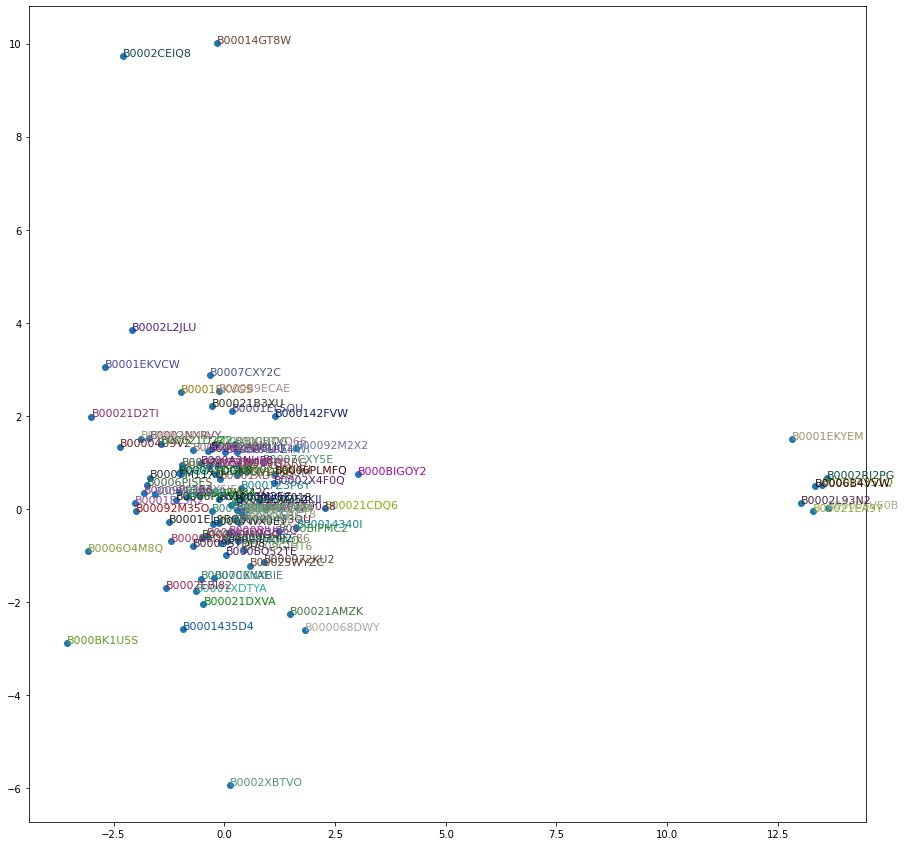

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Taking randomly just 100 asins to avoid overcrowding the plot
idxs = np.random.choice(len(principalDf), 100, replace=False) 
idxs = list(range(100))

# Represent the asins according to the principal components
X = principalDf.iloc[idxs]['principal component 1'].values
Y = principalDf.iloc[idxs]['principal component 3'].values

# Plot the asins
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip([trainset.to_raw_iid(idx) for idx in idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

#Content-based Recommender System (CBRS)

## Read the data

In [53]:
import pandas as pd
import numpy as np

df = pd.read_json("Luxury_Beauty_5.json", lines=True)
dfMd = pd.read_json("meta_Luxury_Beauty.json", lines=True)

## Data Preparation

In [54]:
#Merge both datasets
df = pd.merge(df, dfMd, how='left', on='asin')

In [55]:
#Withhold only relevant columns
df.drop(columns=['reviewTime','style','reviewerName', 'reviewText','summary', 'unixReviewTime','image_x','category', 'tech1','description','fit','also_buy','image_y','tech2','brand','feature', 'rank','main_cat','also_view','similar_item','date','verified','vote','details'],inplace=True)
df.head()

,overall,reviewerID,asin,title,price
0,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00
1,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00
2,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00
3,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00
4,5,A2QCGHIJ2TCLVP,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,$30.00


In [56]:
#Replace NaN w/ zeroes
df.price.fillna(0, inplace=True)

In [57]:
#We use a clean function to check missing values
def missing_values_table(df):
    """
    Function to calculate missing values by column
    Source: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
    :param df: Source data frame
    :return: Data frame with the list of missing value and % of total values per colum
    """
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
title,50,0.1


In [58]:
#Drop the weird row
df.drop(df.loc[df['price']=='.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab'].index, inplace=True)

#Ensure it has been removed
df.price.unique()

array(['$30.00', '$23.00', '$64.00', '$8.40', '', '$8.92', '$39.00',
       '$15.00', '$22.00', '$44.00', '$28.00', '$69.00', '$24.00',
       '$13.68', '$9.95', '$25.00', '$82.00', '$17.50', '$9.50', '$9.99',
       '$37.50', '$59.99', '$60.00', '$30.73', '$27.00', '$40.00',
       '$38.00', '$45.00', '$68.60', '$46.95', '$10.50', '$19.00',
       '$32.00', '$150.00', '$10.00', '$15.99', '$35.00', '$11.00',
       '$146.00', '$29.99', '$47.00', '$26.00', '$73.37', '$39.50',
       '$92.00', '$51.80', '$49.99', '$49.54', '$54.00', '$17.10',
       '$58.00', '$29.00', '$18.00', '$49.50', '$89.00', '$52.00',
       '$65.00', '$36.50', '$21.00', '$16.50', '$16.00', '$105.00',
       '$62.50', '$365.00', '$17.00', '$20.00', '$101.54', '$27.20',
       '$17.99', '$23.99', '$90.00', '$74.00', '$27.50', '$72.00',
       '$96.00', '$8.05', '$54.40', '$124.00', '$16.88', '$30.25',
       '$13.48', '$48.00', '$7.50', '$55.00', '$14.99', '$22.25',
       '$28.88', '$16.24', '$12.00', '$9.00', '$3

In [59]:
#Remove unnecessary characters from price column
df['price'] = df['price'].str.replace('$','')

#Convert price column to a float
df['price'] = pd.to_numeric(df['price'], downcast="float")

#View statistics for price column
df[['price']].describe()

,price
count,27227.000000
mean,36.827396
std,38.767330
min,4.950000
25%,15.950000
50%,26.000000
75%,42.500000
max,495.000000


In [60]:
#Bin prices into price_category
df['price_category']=pd.cut(x=df['price'], bins=[0,16,26,43,500], 
                        labels=["low", "lower_medium","upper_medium", "high"])
#Get dummies per category
df = pd.get_dummies(data=df, columns=['price_category'])
df.head()



,overall,reviewerID,asin,title,price,price_category_low,price_category_lower_medium,price_category_upper_medium,price_category_high
0,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.0,0,0,1,0
1,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.0,0,0,1,0
2,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.0,0,0,1,0
3,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.0,0,0,1,0
4,5,A2QCGHIJ2TCLVP,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.0,0,0,1,0


The recommendation is based on 2 steps:

*   Generate the user profiles: We need to describe the users based on the features (price category) related to the products that they have rated
*  Search for the products more related to each user profile: Once we have the user preferences properly represented (in the user profiles) we need to look for products which description (price categories) fits those preferences.







## User Profile Generation

This technique attempts to figure out what a user's favourite aspects of an item is to then recommend items that present those aspects. In our case, we're going to try to figure out the user's most favorable prices from the products and ratings given.

Let's begin with a single sample user and extract the set of products related to their profile

In [61]:
random_user = "A2HOI48JK8838M"

#DF with Titles and Reviews
inputProducts = pd.DataFrame([df.reviewerID, df.asin, df.title, df.overall,df.price,df.price_category_high,df.price_category_low,df.price_category_lower_medium,df.price_category_upper_medium]).transpose()

#Data for random user
inputProducts = inputProducts[inputProducts.reviewerID == random_user]
products = inputProducts[inputProducts.reviewerID == random_user]
inputProducts

,reviewerID,asin,title,overall,price,price_category_high,price_category_low,price_category_lower_medium,price_category_upper_medium
0,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5,30,0,0,0,1
1,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5,30,0,0,0,1
28,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,3,30,0,0,0,1
29,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,3,30,0,0,0,1
5272,A2HOI48JK8838M,B000NGI4QI,OPI Nail Lacquer Remover,5,NaN,0,0,0,0
6104,A2HOI48JK8838M,B000Q39MBY,Crabtree &amp; Evelyn Nail and Cuticle Therapy...,3,NaN,0,0,0,0
16213,A2HOI48JK8838M,B00396VE7U,Revision Skincare Intellishade SPF 45 Original...,5,75,1,0,0,0
25277,A2HOI48JK8838M,B00FASVFI8,Crabtree &amp; Evelyn Ultra-Moisturising Hand ...,5,20,0,0,1,0
25467,A2HOI48JK8838M,B00FRERO7G,Crabtree &amp; Evelyn Gardeners Ultra-Moisturi...,3,24,0,0,1,0
27296,A2HOI48JK8838M,B00JI7AI3A,"Revision Skincare D.E.J. Eye Cream, 0.5 oz",5,97,1,0,0,0


We can see that the products liked by the user are more or less consistent in terms of price - the most common price category is upper medium and high.

In [62]:
#Dropping unnecessary issues due to save memory and to avoid issues
inputProducts.drop(columns=['reviewerID', 'title','overall','asin','price'],inplace=True)
inputProducts

,price_category_high,price_category_low,price_category_lower_medium,price_category_upper_medium
0,0,0,0,1
1,0,0,0,1
28,0,0,0,1
29,0,0,0,1
5272,0,0,0,0
6104,0,0,0,0
16213,1,0,0,0
25277,0,0,1,0
25467,0,0,1,0
27296,1,0,0,0


Now we're ready to start learning the input's preferences!

To do this, we're going to turn each price category into weights. We can do this by using the user's reviews and multiplying them into the genre table and then summing up the resulting table by column. (i.e., this operation is actually a dot product between a matrix and a vector, so we can simply accomplish by calling Pandas's "dot" function).

In this way, we will give a larger score to those price categories related to the products that the user has rated better. In the same way, price categories related to the products that the user disliked or not interacted with will have a lower score in the user profile.


In [63]:
#Dot produt to get weights
userProfile = inputProducts.transpose().dot(products['overall'])
userProfile

price_category_high            15
price_category_low              0
price_category_lower_medium     8
price_category_upper_medium    16
dtype: object

Now, we have the weights for every of the user's preferences. This user in particular seems to be interested in high and upper medium priced producs.

Using this, we can recommend products that satisfy the user's preferences. Let's start by extracting the genre table from the original dataframe

In [64]:
#Now let's get the price categories of every movie in our original dataframe
productTable = df.set_index(df['asin'])
productTable

,overall,reviewerID,asin,title,price,price_category_low,price_category_lower_medium,price_category_upper_medium,price_category_high
asin,,,,,,,,,
B00004U9V2,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0,0,1,0
B00004U9V2,5,A2HOI48JK8838M,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0,0,1,0
B00004U9V2,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0,0,1,0
B00004U9V2,5,A1YIPEY7HX73S7,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0,0,1,0
B00004U9V2,5,A2QCGHIJ2TCLVP,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...
B01GOZ61O8,4,A2CF66KIQ3RKX3,B01GOZ61O8,TIZO Photoceutical AM Replenish SPF 40 Sunscre...,49.990002,0,0,0,1
B01GOZ61O8,4,A1LKOIZXPQ9VG0,B01GOZ61O8,TIZO Photoceutical AM Replenish SPF 40 Sunscre...,49.990002,0,0,0,1
B01H353HUY,1,AV2RWORXTFRJU,B01H353HUY,ORIBE Bright Blonde Radiance and Repair Treatm...,58.000000,0,0,0,1


In [65]:
#Drop duplicate asins
productTable.drop_duplicates(subset='asin', keep="last",inplace=True)
#And drop the unnecessary information
productTable.drop(columns=['asin','reviewerID', 'title','price'],inplace=True)
productTable #This is for all products

,overall,price_category_low,price_category_lower_medium,price_category_upper_medium,price_category_high
asin,,,,,
B00004U9V2,5,0,0,1,0
B00005V50B,5,0,1,0,0
B000068DWY,5,0,0,0,1
B00014351Q,5,1,0,0,0
B00014340I,5,0,0,0,0
...,...,...,...,...,...
B01G2LF2VW,4,0,0,0,1
B01G8UTFLA,4,0,0,1,0
B01GOZ61O8,4,0,0,0,1


With the user profile as input and the complete list of movies and their genres in hand, we're going to take the weighted average of every movie based on the user profile and recommend the top twenty movies that most satisfy it.

## Calculate Weighted Average per Product

In [66]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((productTable*userProfile).sum(axis=1))/(userProfile.sum())

#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)

recommendationTable_df

asin
B00004U9V2    0.410256
B00B1IFMH6    0.410256
B000IIA5UO    0.410256
B00AKOU452    0.410256
B00AAR9I60    0.410256
                ...   
B00BDJ0LX8    0.000000
B00D13IM8U    0.000000
B00BBIAVDG    0.000000
B00D6V6TTG    0.000000
B00HQKPC8W    0.000000
Length: 1557, dtype: float64

If we look carefuly at the result list we can see the product ID B00004U9V2 which corresponds to Crabtree &amp; Evelyn - Gardener's Ultra-Moist..., which is one of the products that the user already used and rated. We do not want to offer as recommendations products that have been already bought, so we will remove them from the recommendation list

## Final Recommendations

In [67]:
final_recommendation_list = pd.merge(df.loc[df['asin'].isin(recommendationTable_df.head(20).keys())], pd.DataFrame(recommendationTable_df), on="asin")
final_recommendation_list=final_recommendation_list.rename(columns = {0:'score'})
final_recommendation_list.drop(columns=['price_category_high','price_category_low', 'price_category_lower_medium','price_category_upper_medium','reviewerID'],inplace=True)
#Drop duplicate asins
final_recommendation_list.drop_duplicates(subset='asin', keep="last",inplace=True)
final_recommendation_list.sort_values(by='score', ascending=False)

,overall,asin,title,price,score
49,5,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,30.000000,0.410256
65,5,B006XCUR5C,Vichy LiftActiv Supreme Anti-Wrinkle Eye Cream...,33.500000,0.410256
438,4,B00G6H88FK,POMMISST Hydration Spray,33.000000,0.410256
432,4,B00FW6ZTW6,Vichy Dermafinish Corrective Full Coverage Con...,28.000000,0.410256
389,5,B00F6XZNLM,"Obagi Nu-Derm Gentle Cleanser, 6.7 fl. oz.",35.700001,0.410256
355,5,B00F6XZNGM,"Obagi Nu-Derm Toner, 6.7 fl. oz.",35.700001,0.410256
327,5,B00B1IFMH6,"Juice Beauty Stem Cellular CC Cream, 1.7 Fl Oz",39.000000,0.410256
320,5,B000IIA5UO,HOT TOOLS Professional 24k Gold Extra-Long Bar...,40.180000,0.410256
216,4,B00AKOU452,"LORAC POREfection Mattifying Face Primer, 1.7 ...",33.000000,0.410256
208,5,B00AAR9I60,"Obagi Hydrate Facial Moisturizer, 1.7 oz.",42.500000,0.410256
